<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/Apple_prophet_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Prophet Assignment

#### Deleverables
- Pick a timeseries dataset
    - Ideas
        - [Yellow cab averages](https://raw.githubusercontent.com/gumdropsteve/datasets/master/yellow_cab_ymd_averages.csv)
            - some columns here have wacky values
        - [warobson Medium views](https://raw.githubusercontent.com/gumdropsteve/datasets/master/views.csv)
        - [$BRK-B stock](https://github.com/gumdropsteve/datasets/blob/master/stocks/BRK-B.csv)
    - Adjust the dataset so it's ready for Prophet
        - i.e. make sure you have columns `ds` (date) and `y` (target)  
- Make a basic Prophet model
- Forecast n periods
    - Pick n based on what makes sense for your data
- Visualize your forecast
- Examine your components
    - What's going on?
- Cross validate your forecast

#### Resources
- [Intro to Prophet repo](https://github.com/gumdropsteve/intro_to_prophet 
)
- [warobson Prophet blog posts](https://gumdropsteve.github.io/blog/docs/ds/prophet 
)
- [Prophet docs](https://facebook.github.io/prophet 
)
- [Prophet paper](https://peerj.com/preprints/3190/ 
)

# import and set up our data

In [ ]:
# your stuff here
import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/stocks/AAPL.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-17,10.757143,10.856786,10.634286,10.732142,9.182909,479449600
1,2010-11-18,10.900000,11.059643,10.881785,11.015357,9.425239,494491200
2,2010-11-19,10.998929,11.014286,10.901428,10.954643,9.373289,384843200
3,2010-11-22,10.952857,11.191428,10.923928,11.191428,9.575893,393075200
4,2010-11-23,11.087500,11.133928,10.948571,11.026072,9.434405,519447600


In [ ]:
df = df[['Date', 'Adj Close']]

df.columns = ['ds', 'y']

df

,ds,y
0,2010-11-17,9.182909
1,2010-11-18,9.425239
2,2010-11-19,9.373289
3,2010-11-22,9.575893
4,2010-11-23,9.434405
...,...,...
2512,2020-11-10,115.970001
2513,2020-11-11,119.489998
2514,2020-11-12,119.209999
2515,2020-11-13,119.260002


# Step 1: import prophet & set up model



In [ ]:

from fbprophet import Prophet

m = Prophet()


# Step 2: fit the model

In [ ]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Step 3: make a dataframe to hold your future value predictions

In [ ]:

f = m.make_future_dataframe(365*5)

f

,ds
0,2010-11-17
1,2010-11-18
2,2010-11-19
3,2010-11-22
4,2010-11-23
...,...
4337,2025-11-11
4338,2025-11-12
4339,2025-11-13
4340,2025-11-14


# Step 4: make a forecast (make some predictions)



In [ ]:
m.predict(f)

In [ ]:
forecast = m.predict(f)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4337,2025-11-11,281.016212,145.370856,422.880687
4338,2025-11-12,281.067583,145.520546,425.579215
4339,2025-11-13,281.046907,144.038970,425.085409
4340,2025-11-14,280.975693,143.578647,423.830316
4341,2025-11-15,280.581650,145.335802,427.025433


# Step 5: visualize the forecast

* Black dots: actual values
* Blue lines: upper, actual (dark blue), lower windows for yhat
* Blue blob: prediction window (yhat window)

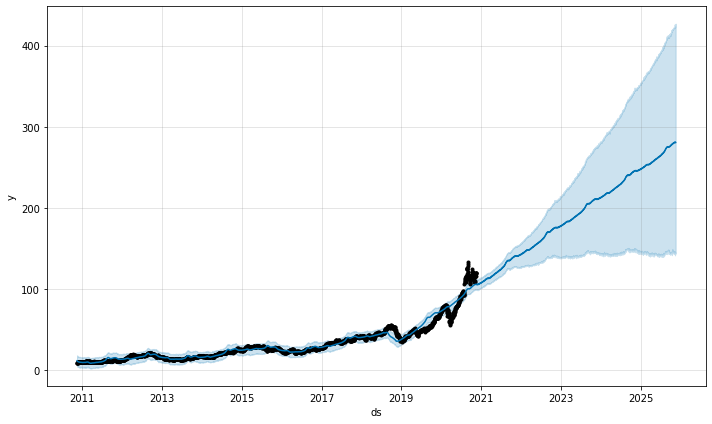

In [ ]:
m.plot(forecast);


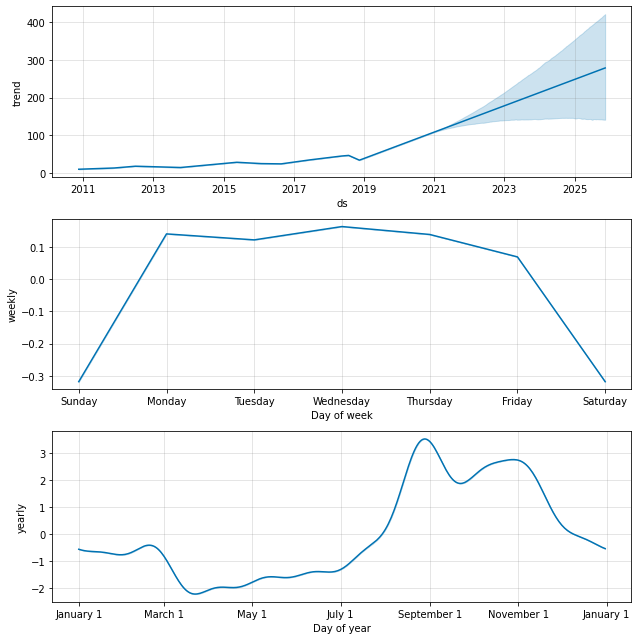

In [ ]:
m.plot_components(forecast);

- there is a  high chance for apple to growth  much more on future than now as we can see here on first chart the stock price go tthe double after five years

- as wa can see the weekly chart is stable except on the weekend days 
- from mounthly prespictive  we can see that the last quarter of year has the highest stock value

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

**here is an intractive chart to show apple stock**

# Step 6: model evaluation

* initial: how much data to consider before making any predictions

  e.g. 10 years = '3650 days'
* period: how frequently to make predictions

  e.g. every 6 months = '180 days'

* should be about 1/2 of your horizon

* horizon: how many periods to predict

  e.g. 1 year = '365 days'

* should be about 2x your period

In [ ]:
%%time
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, 
                         initial='1825 days',  # 5 years to start 
                         period='180 days',  # then make a prediction every 6 months 
                         horizon='365 days'  # predict a whole year each prediction
                         )

df_cv

INFO:fbprophet:Making 9 forecasts with cutoffs between 2015-12-08 00:00:00 and 2019-11-17 00:00:00



CPU times: user 34.3 s, sys: 405 ms, total: 34.7 s
Wall time: 34.8 s


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-12-09,26.900429,25.928467,28.035713,26.562178,2015-12-08
1,2015-12-10,26.881120,25.756728,27.844195,26.688534,2015-12-08
2,2015-12-11,26.804905,25.797009,27.848692,26.001623,2015-12-08
3,2015-12-14,26.781712,25.740574,27.792592,25.840809,2015-12-08
4,2015-12-15,26.726426,25.629090,27.735293,25.383627,2015-12-08
...,...,...,...,...,...,...
2260,2020-11-10,59.177931,53.123598,65.065937,115.970001,2019-11-17
2261,2020-11-11,59.061447,52.623602,65.447491,119.489998,2019-11-17
2262,2020-11-12,58.929866,53.049815,64.996187,119.209999,2019-11-17
2263,2020-11-13,58.766691,52.694860,64.774040,119.260002,2019-11-17


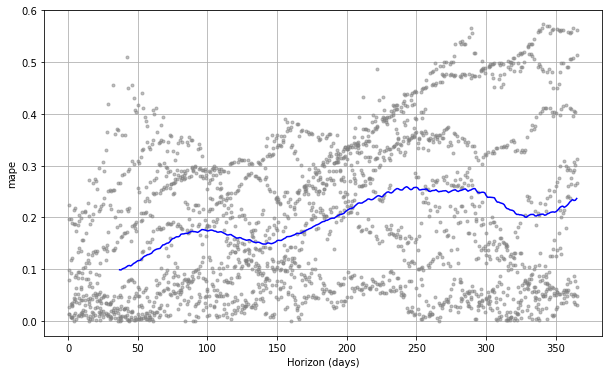

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape');
